### Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Reading Wallmart.CSV Dataset 

In [2]:
df = pd.read_csv('Walmart DataSet\Walmart DataSet.csv')

In [3]:
print(df.to_string())

      Store        Date  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price         CPI  Unemployment
0         1  05-02-2010    1643690.90             0        42.31       2.572  211.096358         8.106
1         1  12-02-2010    1641957.44             1        38.51       2.548  211.242170         8.106
2         1  19-02-2010    1611968.17             0        39.93       2.514  211.289143         8.106
3         1  26-02-2010    1409727.59             0        46.63       2.561  211.319643         8.106
4         1  05-03-2010    1554806.68             0        46.50       2.625  211.350143         8.106
5         1  12-03-2010    1439541.59             0        57.79       2.667  211.380643         8.106
6         1  19-03-2010    1472515.79             0        54.58       2.720  211.215635         8.106
7         1  26-03-2010    1404429.92             0        51.45       2.732  211.018042         8.106
8         1  02-04-2010    1594968.28             0        62.27       2.

### Performing EDA - Wallmart Dataset

In [4]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [6]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

In [7]:
df[df['Store'] == 1]

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908
139,1,2012-10-05,1670785.97,0,68.55,3.617,223.181477,6.573
140,1,2012-10-12,1573072.81,0,62.99,3.601,223.381296,6.573
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573


1. If the weekly sales are affected by the unemployment rate, if yes - which stores
are suffering the most?

In [8]:
df_corr_by_unemployment = df.groupby('Store').apply(lambda x : x['Weekly_Sales'].corr(x['Unemployment']))
df_corr_by_unemployment.sort_values().head(5)

Store
38   -0.785290
44   -0.780076
39   -0.384681
42   -0.356355
41   -0.350630
dtype: float64

2. If the weekly sales show a seasonal trend, when and what could be the reason?

In [9]:
data = df[['Date', 'Weekly_Sales','Holiday_Flag','Temperature','Fuel_Price','CPI','Unemployment']]

In [10]:
data

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...
6430,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [11]:
data.sort_values(by='Date', inplace=True)

In [12]:
data.reset_index(drop=True, inplace=True)

In [13]:
data

,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765
2,2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554
3,2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548
4,2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324
...,...,...,...,...,...,...,...
6430,2012-10-26,688940.94,0,56.69,3.882,216.151590,7.293
6431,2012-10-26,319550.77,0,71.70,3.506,224.037814,5.422
6432,2012-10-26,921264.52,0,49.65,3.917,138.728161,4.145
6433,2012-10-26,1127516.25,0,56.09,3.917,138.728161,8.243


In [14]:
data.set_index('Date', inplace=True)

In [15]:
data

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,
2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
2010-02-05,2193048.75,0,54.34,2.962,126.442065,9.765
2010-02-05,536006.73,0,45.97,2.572,209.852966,8.554
2010-02-05,789036.02,0,23.11,2.666,126.442065,6.548
2010-02-05,465108.52,0,39.05,2.572,210.752605,8.324
...,...,...,...,...,...,...
2012-10-26,688940.94,0,56.69,3.882,216.151590,7.293
2012-10-26,319550.77,0,71.70,3.506,224.037814,5.422
2012-10-26,921264.52,0,49.65,3.917,138.728161,4.145


In [16]:
data = data.groupby(pd.Grouper(freq='W')).agg(
    Weekly_Sales = ('Weekly_Sales', 'sum'),
    Holiday_Flag = ('Holiday_Flag', 'mean'),
    Temperature= ('Temperature', 'mean'),
    Fuel_Price= ('Fuel_Price', 'mean'),	
    CPI= ('CPI', 'mean'),
    Unemployment= ('Unemployment', 'mean')
)

In [17]:
data

,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Date,,,,,,
2010-02-07,49750740.50,0.0,34.037333,2.717844,167.730885,8.619311
2010-02-14,48336677.63,1.0,34.151333,2.694022,167.825608,8.619311
2010-02-21,48276993.78,0.0,37.719778,2.672067,167.871686,8.619311
2010-02-28,43968571.13,0.0,39.243556,2.683933,167.909657,8.619311
2010-03-07,46871470.30,0.0,42.917333,2.731200,167.947628,8.619311
...,...,...,...,...,...,...
2012-09-30,43734899.40,0.0,68.754444,3.854578,176.373588,7.237333
2012-10-07,47566639.31,0.0,65.973111,3.845222,176.505052,6.953711
2012-10-14,46128514.25,0.0,58.342667,3.896733,176.636515,6.953711


<Axes: xlabel='Date'>

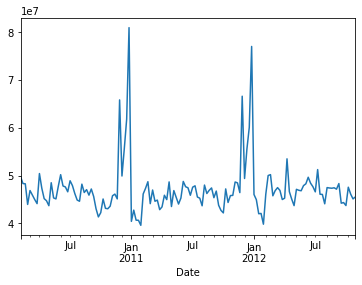

In [18]:
data['Weekly_Sales'].plot()

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose

Figure(432x288)


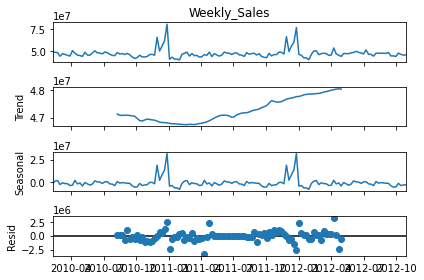

In [20]:
decomposed = seasonal_decompose(data['Weekly_Sales'])
print(decomposed.plot())

3. Does temperature affect the weekly sales in any manner

In [21]:
data['Weekly_Sales'].corr(data['Temperature'])

-0.15915988004722792

In [22]:
df['Weekly_Sales'].corr(df['Temperature'])

-0.06381001317946956

In [23]:
df_corr_by_temperature = df.groupby('Store').apply(lambda x : x['Weekly_Sales'].corr(x['Temperature']))
df_corr_by_temperature.sort_values().head(5)

Store
10   -0.432569
12   -0.379416
3    -0.377524
28   -0.376506
30   -0.330816
dtype: float64

4. How is the Consumer Price index affecting the weekly sales of various stores?

In [24]:
df_corr_by_CPI = df.groupby('Store').apply(lambda x : x['Weekly_Sales'].corr(x['CPI']))
df_corr_by_CPI.sort_values()

Store
36   -0.915095
35   -0.424107
14   -0.419755
30   -0.298188
43   -0.285686
27   -0.213082
18   -0.193541
15   -0.174467
21   -0.163649
19   -0.155341
10   -0.115374
28   -0.095908
29   -0.072530
2    -0.062431
33   -0.052271
22   -0.038602
45   -0.023548
24   -0.013684
6    -0.011357
25   -0.010914
20    0.058706
11    0.069781
12    0.084087
23    0.084248
40    0.113318
34    0.115437
8     0.120255
16    0.124285
26    0.131980
31    0.132887
13    0.163976
32    0.196782
1     0.225408
37    0.244507
7     0.289044
9     0.294805
5     0.308261
3     0.317250
17    0.348571
4     0.351157
42    0.360859
41    0.392293
39    0.428043
44    0.740150
38    0.812837
dtype: float64

5. Top performing stores according to the historical data.

In [25]:
top_performing_store = df.groupby('Store')['Weekly_Sales'].sum()
top_performing_store.sort_values(ascending=False).head(5)

Store
20    3.013978e+08
4     2.995440e+08
14    2.889999e+08
13    2.865177e+08
2     2.753824e+08
Name: Weekly_Sales, dtype: float64

6. The worst performing store, and how significant is the difference between the highest and lowest performing stores.

In [26]:
print(top_performing_store.sort_values(ascending=False).tail(1))

Store
33    37160221.96
Name: Weekly_Sales, dtype: float64


In [27]:
worst_performer = list(top_performing_store.sort_values(ascending=False).tail(1))
top_performer = list(top_performing_store.sort_values(ascending=False).head(1))

In [28]:
top_performer[0] - worst_performer[0]

264237570.49999997

### Use predictive modeling techniques to forecast the sales for each store for the next 12weeks.

In [96]:
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,2012-09-28,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,2012-10-05,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,2012-10-12,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,2012-10-19,718125.53,0,56.47,3.969,192.330854,8.667


In [97]:
df['Store'].nunique()

45

#### Using Predictive Model for Checking which Model of Time Series Works Well on the Test Data on Store N0. 1 

In [98]:
stores_data = {store: data for store, data in df.groupby("Store")[['Date','Weekly_Sales']]}

store_1_data = stores_data[1]
store_1_data

,Date,Weekly_Sales
0,2010-02-05,1643690.90
1,2010-02-12,1641957.44
2,2010-02-19,1611968.17
3,2010-02-26,1409727.59
4,2010-03-05,1554806.68
...,...,...
138,2012-09-28,1437059.26
139,2012-10-05,1670785.97
140,2012-10-12,1573072.81
141,2012-10-19,1508068.77


In [99]:
store_1_data.sort_values('Date', inplace=True)

In [100]:
store_1_data.set_index('Date', inplace=True)

In [101]:
store_1_data

,Weekly_Sales
Date,
2010-02-05,1643690.90
2010-02-12,1641957.44
2010-02-19,1611968.17
2010-02-26,1409727.59
2010-03-05,1554806.68
...,...
2012-09-28,1437059.26
2012-10-05,1670785.97
2012-10-12,1573072.81


In [102]:
store_1_data = store_1_data.groupby(pd.Grouper(freq = 'W')).sum()

In [103]:
store_1_data.shape

(143, 1)

In [104]:
store_1_data.duplicated().sum()

0

In [105]:
store_1_data.isna().sum()

Weekly_Sales    0
dtype: int64

<Axes: xlabel='Date'>

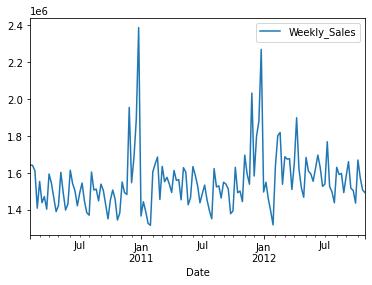

In [106]:
store_1_data.plot()

Figure(432x288)


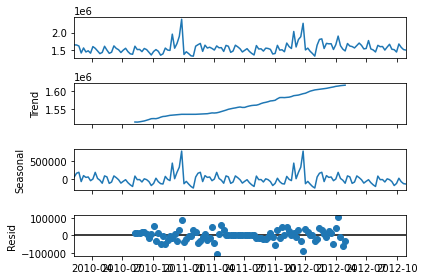

In [107]:
decomposed_graph = seasonal_decompose(store_1_data)
print(decomposed_graph.plot())

#### Stationary Analysis

In [108]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(store_1_data['Weekly_Sales'])
p_val = result[1]
if p_val < 0.05 :
  print( "Data is Stationary")
else:
  print("Data is not Stationary")

Data is Stationary


If the $p$-value is < $0.05$, then our data is stationary otherwise our data is non-stationary

In [109]:
train_df = store_1_data[0:131]
test_df = store_1_data[131:]

In [110]:
train_df.shape

(131, 1)

In [111]:
test_df.shape

(12, 1)

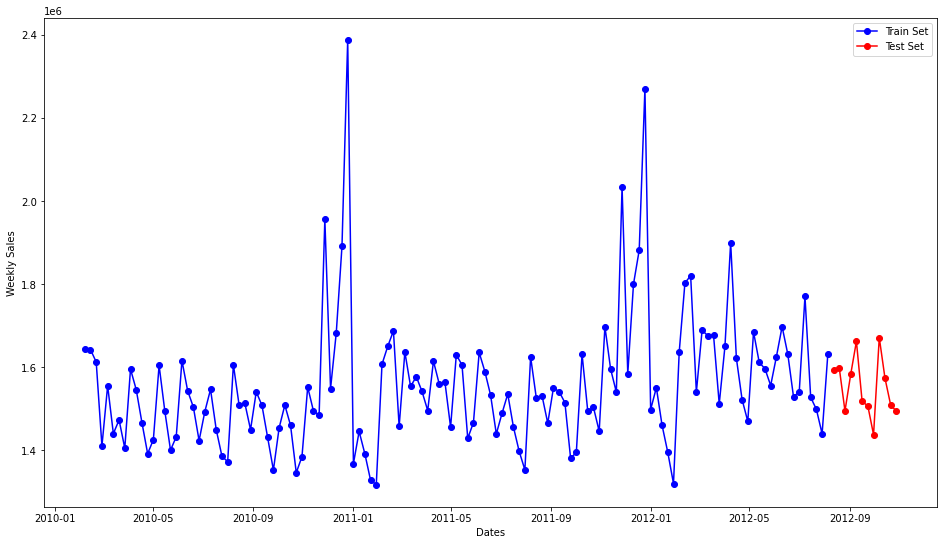

In [112]:
plt.figure(figsize=(16, 9))
plt.plot(train_df.index,train_df.Weekly_Sales, marker = 'o', linewidth = 1.5, color = 'b', label="Train Set")
plt.plot(test_df.index,test_df.Weekly_Sales, marker = 'o', linewidth = 1.5, color = 'r', label="Test Set")
plt.xlabel("Dates")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

In [113]:
from scipy.stats import boxcox

In [114]:
df_boxcox = pd.Series(boxcox(train_df['Weekly_Sales'], lmbda=0), index=train_df.index)

In [115]:
df_boxcox

Date
2010-02-07    14.312455
2010-02-14    14.311400
2010-02-21    14.292966
2010-02-28    14.158907
2010-03-07    14.256862
                ...    
2012-07-08    14.386408
2012-07-15    14.238825
2012-07-22    14.219611
2012-07-29    14.179545
2012-08-05    14.304787
Freq: W-SUN, Length: 131, dtype: float64

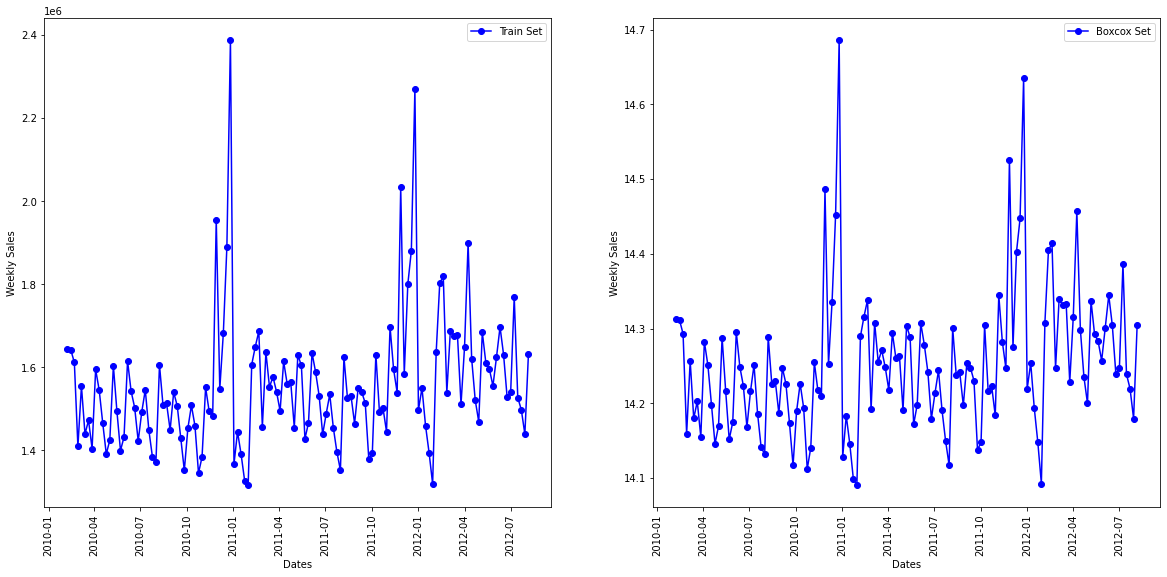

In [116]:
plt.figure(figsize=(20, 9))
plt.subplot(1, 2, 1)
plt.plot(train_df.index,train_df.Weekly_Sales, marker = 'o', linewidth = 1.5, color = 'b', label="Train Set")
plt.xticks(rotation = 90)
plt.xlabel("Dates")
plt.ylabel("Weekly Sales")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(df_boxcox.index,df_boxcox, marker = 'o', linewidth = 1.5, color = 'b', label="Boxcox Set")
plt.xticks(rotation = 90)
plt.xlabel("Dates")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

In [117]:
#this removes varying variance from the data
df_boxcox_diff = df_boxcox.diff()

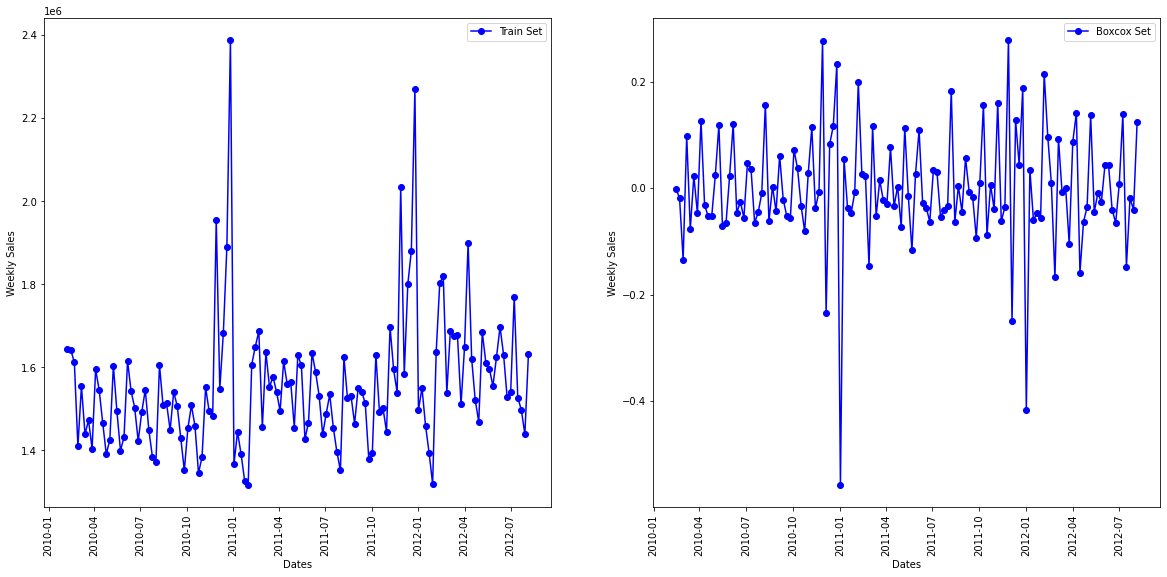

In [118]:
plt.figure(figsize=(20, 9))
plt.subplot(1, 2, 1)
plt.plot(train_df.index,train_df.Weekly_Sales, marker = 'o', linewidth = 1.5, color = 'b', label="Train Set")
plt.xticks(rotation = 90)
plt.xlabel("Dates")
plt.ylabel("Weekly Sales")
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(df_boxcox_diff.index,df_boxcox_diff, marker = 'o', linewidth = 1.5, color = 'b', label="Boxcox Set")
plt.xticks(rotation = 90)
plt.xlabel("Dates")
plt.ylabel("Weekly Sales")
plt.legend()
plt.show()

In [119]:
df_boxcox_diff

Date
2010-02-07         NaN
2010-02-14   -0.001055
2010-02-21   -0.018433
2010-02-28   -0.134059
2010-03-07    0.097955
                ...   
2012-07-08    0.138841
2012-07-15   -0.147583
2012-07-22   -0.019214
2012-07-29   -0.040066
2012-08-05    0.125242
Freq: W-SUN, Length: 131, dtype: float64

In [120]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


Figure(432x288)
Figure(432x288)


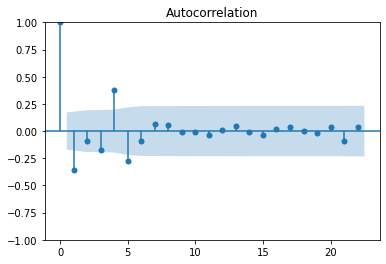

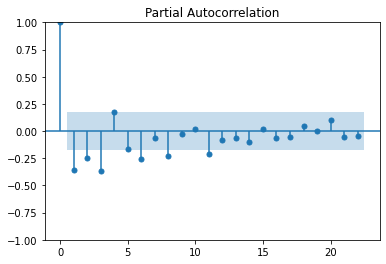

In [121]:
print(plot_acf(df_boxcox_diff[1:]))
print(plot_pacf(df_boxcox_diff[1:]))

- The Values that we are getting from the pacf and acf plots of p and q respectively are (1, 2, 3, 6, 8, 11) and (1, 4, 5)

In [146]:
from statsmodels.tsa.arima.model import ARIMA

In [147]:
ar_model = ARIMA(df_boxcox_diff, order=(1, 0, 0))
ar_model = ar_model.fit()

In [148]:
ar_model_preds = ar_model.predict(start = len(train_df), end = len(store_1_data)-1)

In [149]:
df_boxcox_diff_preds = pd.concat([df_boxcox_diff, ar_model_preds])

In [150]:
# Reverse the differencing transformation that was done on the data
df_boxcox_preds = df_boxcox_diff_preds.cumsum()
df_boxcox_preds = df_boxcox_preds.add(df_boxcox[0])

In [151]:
df_preds = np.exp(df_boxcox_preds)

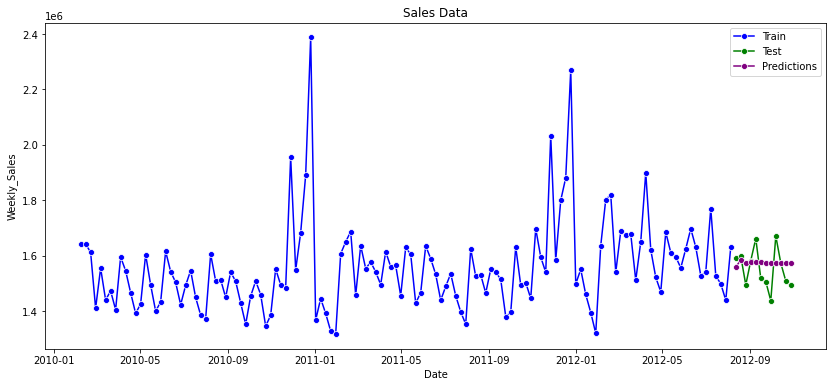

In [152]:
plt.figure(figsize = (14, 6))
sns.lineplot(data = train_df, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = test_df, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[len(train_df):], y = df_preds.values[len(train_df):], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Sales Data');

In [153]:
from sklearn.metrics import mean_squared_error

In [154]:
# Summarize the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = test_df['Weekly_Sales'], y_pred = df_preds.values[len(train_df):]))

rmse = np.round(rmse, 2)

performance_df = pd.DataFrame(index = [0],data = {'Model': 'AR', 'RMSE': rmse})

performance_df.set_index('Model', inplace = True)

performance_df

,RMSE
Model,
AR,71788.36


In [155]:
arima_model = ARIMA(df_boxcox, order=(1, 0, 1))
arima_model = arima_model.fit()

In [156]:
arima_preds = arima_model.predict(start=len(train_df), end=len(store_1_data) - 1)

In [157]:
df_boxcox_preds = pd.concat([df_boxcox, arima_preds])

In [158]:
df_preds = np.exp(df_boxcox_preds)

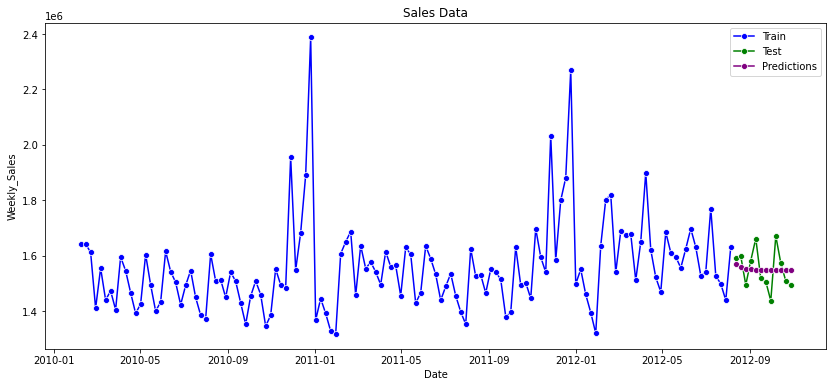

In [159]:
plt.figure(figsize = (14, 6))
sns.lineplot(data = train_df, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = test_df, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[len(train_df):], y = df_preds.values[len(train_df):], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Sales Data');

In [160]:
rmse = np.sqrt(mean_squared_error(y_true = test_df['Weekly_Sales'], y_pred = df_preds.values[len(train_df):]))

rmse = np.round(rmse, 2)

performance_df_temp = pd.DataFrame(index = [0], data = {'Model': 'ARIMA', 'RMSE': rmse})

performance_df_temp.set_index('Model', inplace = True)

performance_df = pd.concat([performance_df, performance_df_temp])

performance_df

,RMSE
Model,
AR,71788.36
ARIMA,67516.43


In [161]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [162]:
sarima_model = SARIMAX(df_boxcox, order = (1,0,1), seasonal_order = (1,0,1, 52))
sarima_model = sarima_model.fit()

In [163]:
sarima_model_preds = sarima_model.predict(start = len(train_df), end = len(store_1_data)-1)

In [164]:
df_boxcox_preds = pd.concat([df_boxcox, sarima_model_preds])

In [165]:
# Reverse the Box-Cox transformation that was done on the data
df_preds = np.exp(df_boxcox_preds)

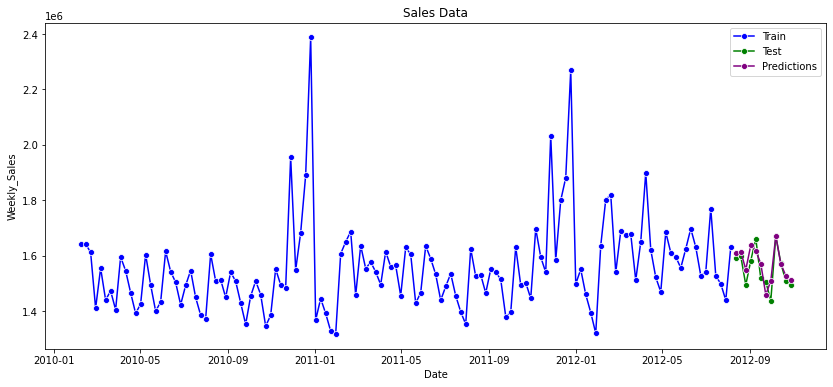

In [166]:
plt.figure(figsize = (14, 6))
sns.lineplot(data = train_df, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'blue', label = 'Train')
sns.lineplot(data = test_df, x = 'Date', y = 'Weekly_Sales', marker = 'o', color = 'green', label = 'Test')
sns.lineplot(x = df_preds.index[len(train_df):], y = df_preds.values[len(train_df):], marker = 'o', color = 'purple', label = 'Predictions')
plt.title('Sales Data');

In [167]:
# Summarize the performance of the model on the test data using RMSE and MAPE
rmse = np.sqrt(mean_squared_error(y_true = test_df['Weekly_Sales'], y_pred = df_preds.values[len(train_df):]))

rmse = np.round(rmse, 2)

performance_df_temp = pd.DataFrame(index = [0], data = {'Model': 'SARIMA', 'RMSE': rmse})

performance_df_temp.set_index('Model', inplace = True)

performance_df = pd.concat([performance_df, performance_df_temp])

performance_df

,RMSE
Model,
AR,71788.36
ARIMA,67516.43
SARIMA,40232.45


#### Conclusion 
- On analysing the behiavour and performance of the predictive model, Sarmia has the minimim RMSE Value amoung AR, ARIMA and SARIMA 

### Forcasting Weekly Sales by Using SARIMA Model

- Grouping the Data through their Store Number, as there are 45 Stores

In [91]:
stores_data = {store: data for store, data in df.groupby("Store")[['Date','Weekly_Sales']]}

In [92]:
forecasts = {}
error_metrics = {}
for storeNo, storeData in stores_data.items():
    storeData.sort_values(by='Date',inplace=True)
    storeData.set_index('Date', inplace= True)
    if storeNo == 1:
        print(storeNo)
        print(storeData)
    storeData = storeData.groupby(pd.Grouper(freq='W')).sum()
    df_boxcox = pd.Series(boxcox(storeData['Weekly_Sales'], lmbda=0), index=storeData.index)
    sarima_model = SARIMAX(df_boxcox, order = (1,0,1), seasonal_order = (1,0,1, 52))
    sarima_model = sarima_model.fit()
    forecast = np.exp(sarima_model.forecast(steps=12))
    forecasts[storeNo] = forecast


1
            Weekly_Sales
Date                    
2010-02-05    1643690.90
2010-02-12    1641957.44
2010-02-19    1611968.17
2010-02-26    1409727.59
2010-03-05    1554806.68
...                  ...
2012-09-28    1437059.26
2012-10-05    1670785.97
2012-10-12    1573072.81
2012-10-19    1508068.77
2012-10-26    1493659.74

[143 rows x 1 columns]


c:\Users\Afaf_\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Afaf_\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Afaf_\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\Afaf_\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

In [93]:
forecasts

{1: 2012-11-04    1.713096e+06
 2012-11-11    1.631466e+06
 2012-11-18    1.596223e+06
 2012-11-25    2.078160e+06
 2012-12-02    1.649705e+06
 2012-12-09    1.828355e+06
 2012-12-16    1.965994e+06
 2012-12-23    2.396221e+06
 2012-12-30    1.519681e+06
 2013-01-06    1.584192e+06
 2013-01-13    1.509955e+06
 2013-01-20    1.445004e+06
 Freq: W-SUN, Name: predicted_mean, dtype: float64,
 2: 2012-11-04    2.034933e+06
 2012-11-11    2.001688e+06
 2012-11-18    2.003008e+06
 2012-11-25    2.703220e+06
 2012-12-02    2.057069e+06
 2012-12-09    2.398546e+06
 2012-12-16    2.566999e+06
 2012-12-23    3.352505e+06
 2012-12-30    1.913572e+06
 2013-01-06    1.867477e+06
 2013-01-13    1.826552e+06
 2013-01-20    1.806967e+06
 Freq: W-SUN, Name: predicted_mean, dtype: float64,
 3: 2012-11-04    482954.381813
 2012-11-11    437654.683437
 2012-11-18    428016.792018
 2012-11-25    582177.071848
 2012-12-02    503669.317846
 2012-12-09    499135.890781
 2012-12-16    535542.419135
 2012-12-23 

inf